In [136]:
# import the ECC dataset
import pandas as pd


In [137]:
df = pd.read_csv('/home/sbourgeat/Project/homology2voxel_pairwise/persistence_entropy_100_female.csv')

In [138]:
df

,cluster_id,pe_0,pe_1,pe_2,alpha_entropy0,alpha_entropy1,alpha_entropy2,cluster_size
0,61,NaN,NaN,NaN,0.981317,2.857376,-1.000000,30
1,66,NaN,NaN,NaN,1.000000,1.370836,-0.000000,46
2,90,NaN,NaN,NaN,0.967904,2.745568,-0.000000,16
3,263,NaN,NaN,NaN,0.814142,-1.000000,-1.000000,10
4,281,NaN,NaN,NaN,0.985961,1.482501,5.774338,30
...,...,...,...,...,...,...,...,...
561,3452,NaN,NaN,NaN,0.930688,-1.000000,-1.000000,14
562,3453,NaN,NaN,NaN,0.946403,-0.000000,-1.000000,6
563,3487,NaN,NaN,NaN,0.739540,-1.000000,-1.000000,7
564,3497,NaN,NaN,NaN,0.953146,-3.401076,-1.000000,17


# Assuming df is your DataFrame and 'ecc' is the name of the column
df['ecc'] = df['ecc'].apply(lambda x: [float(num) for num in x.strip('[\n ]').split()])

# Print the transformed DataFrame
print(df)


In [139]:
match = pd.read_csv('/home/sbourgeat/Project/matched_coords/matched_points.csv')

In [140]:
match['file'][0]

'/home/samuel/brainMorpho/Analysis_results/rotated_coords/coordinates_131_male.csv'

In [141]:
import os
import pandas as pd
from sklearn.cross_decomposition import CCA
from sklearn.preprocessing import StandardScaler



In [142]:
# Function to extract genotype number and sex from file name
def extract_genotype_info(file_name):
    genotype_info = file_name.split('.')[0].split('_')
    genotype_number = "DGRP_" + genotype_info[-2]  # Assuming genotype is the second-to-last element
    sex = genotype_info[-1]
    if sex == "male":
        sex = "M"
    elif sex == "female":
        sex = "F"
    return genotype_number, sex

# Read ECC data for each genotype from files in a folder and combine into a single DataFrame
folder_path = "/home/sbourgeat/Project/Results_ECC/homology2voxel_pairwise/"
genotype_data = []
for file_name in os.listdir(folder_path):
    if file_name.endswith('.csv'):
        file_path = os.path.join(folder_path, file_name)
        genotype_number, sex = extract_genotype_info(file_name)
        genotype_df = pd.read_csv(file_path)  # Assuming CSV files have ECC data
        genotype_df['ecc'] = genotype_df['ecc'].apply(lambda x: [float(num) for num in x.strip('[\n ]').split()])# format the ecc col
        genotype_df['DGRP'] = genotype_number  # Add genotype number as a column
        genotype_df['sex'] = sex  # Add sex as a column
        genotype_data.append(genotype_df)

In [101]:
# Function to extract genotype number and sex from file name
def extract_genotype_info(file_name):
    genotype_info = file_name.split('.')[0].split('_')
    genotype_number = "DGRP_" + genotype_info[-2]  # Assuming genotype is the second-to-last element
    sex = genotype_info[-1]
    if sex == "male":
        sex = "M"
    elif sex == "female":
        sex = "F"
    return genotype_number, sex

# Read data for each genotype from files in a folder and combine into a single DataFrame
folder_path = "/home/sbourgeat/Project/homology2voxel_pairwise/"
genotype_data = []
for file_name in os.listdir(folder_path):
    if file_name.endswith('.csv'):
        file_path = os.path.join(folder_path, file_name)
        genotype_number, sex = extract_genotype_info(file_name)
        genotype_df = pd.read_csv(file_path)  # Assuming CSV files have data
        genotype_df['alpha_entropy0'] = genotype_df['alpha_entropy0'].apply(lambda x: float(x)) # Assuming alpha_entropy0 is in string format
        genotype_df['alpha_entropy1'] = genotype_df['alpha_entropy1'].apply(lambda x: float(x)) # Assuming alpha_entropy1 is in string format
        genotype_df['alpha_entropy2'] = genotype_df['alpha_entropy2'].apply(lambda x: float(x)) # Assuming alpha_entropy2 is in string format
        genotype_df['DGRP'] = genotype_number  # Add genotype number as a column
        genotype_df['sex'] = sex  # Add sex as a column
        genotype_data.append(genotype_df)


In [143]:
genotype_data

[     cluster_id  pe_0  pe_1  pe_2  alpha_entropy0  alpha_entropy1  \
 0            10   NaN   NaN   NaN               0               0   
 1           156   NaN   NaN   NaN               0               0   
 2           161   NaN   NaN   NaN               0               0   
 3           178   NaN   NaN   NaN               0               0   
 4           188   NaN   NaN   NaN               0               0   
 ..          ...   ...   ...   ...             ...             ...   
 788        3781   NaN   NaN   NaN               0               0   
 789        3787   NaN   NaN   NaN               0               0   
 790        3802   NaN   NaN   NaN               0               0   
 791        3813   NaN   NaN   NaN               0               0   
 792        3820   NaN   NaN   NaN               0               0   
 
      alpha_entropy2                                                ecc  \
 0                 0  [-172.0, -172.0, 70.0, 2.0, 0.0, -1.0, -4.0, -...   
 1      

In [144]:

# Combine ECC data into a single DataFrame
combined_data = pd.concat(genotype_data, ignore_index=True)


In [145]:
combined_data 
# Add Coordinates of the clusters

,cluster_id,pe_0,pe_1,pe_2,alpha_entropy0,alpha_entropy1,alpha_entropy2,ecc,cluster_size,DGRP,sex
0,10,NaN,NaN,NaN,0,0,0,"[-172.0, -172.0, 70.0, 2.0, 0.0, -1.0, -4.0, -...",234,DGRP_309,M
1,156,NaN,NaN,NaN,0,0,0,"[8.0, 8.0, 3.0, 3.0, 1.0, 1.0, 2.0, 1.0, 0.0, ...",9,DGRP_309,M
2,161,NaN,NaN,NaN,0,0,0,"[-2.0, -2.0, -2.0, -2.0, -6.0, -6.0, 2.0, 1.0,...",20,DGRP_309,M
3,178,NaN,NaN,NaN,0,0,0,"[8.0, 8.0, 8.0, 8.0, 8.0, -1.0, -1.0, -1.0, 3....",10,DGRP_309,M
4,188,NaN,NaN,NaN,0,0,0,"[13.0, -6.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0...",22,DGRP_309,M
...,...,...,...,...,...,...,...,...,...,...,...
82972,4118,NaN,NaN,NaN,0,0,0,"[4.0, 4.0, -1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0,...",10,DGRP_843,M
82973,4138,NaN,NaN,NaN,0,0,0,"[-2.0, -2.0, -2.0, -2.0, -2.0, -2.0, -2.0, -2....",13,DGRP_843,M
82974,4161,NaN,NaN,NaN,0,0,0,"[-9.0, -9.0, -9.0, -4.0, -4.0, 1.0, 1.0, 1.0, ...",33,DGRP_843,M
82975,4183,NaN,NaN,NaN,0,0,0,"[-4.0, -4.0, -4.0, -4.0, -4.0, -4.0, -4.0, -4....",12,DGRP_843,M


In [146]:
behav = pd.read_csv("dgrpool_kl_behaviour.tsv",sep = '\t')

In [147]:
all_data = pd.merge(combined_data, behav, on=["DGRP", "sex"])

In [148]:
all_data

,cluster_id,pe_0,pe_1,pe_2,alpha_entropy0,alpha_entropy1,alpha_entropy2,ecc,cluster_size,DGRP,...,LSM_frac,LSM_frac_se,LSM_ls,LSM_ls_se,KL_frac,KL_ls,en_s_frac,en_ns_frac,en_s_ls,en_ns_ls
0,10,NaN,NaN,NaN,0,0,0,"[-172.0, -172.0, 70.0, 2.0, 0.0, -1.0, -4.0, -...",234,DGRP_309,...,0.036524,0.030042,-0.181848,0.523066,0.711294,0.137173,0.803315,0.673012,1.212314,1.461472
1,156,NaN,NaN,NaN,0,0,0,"[8.0, 8.0, 3.0, 3.0, 1.0, 1.0, 2.0, 1.0, 0.0, ...",9,DGRP_309,...,0.036524,0.030042,-0.181848,0.523066,0.711294,0.137173,0.803315,0.673012,1.212314,1.461472
2,161,NaN,NaN,NaN,0,0,0,"[-2.0, -2.0, -2.0, -2.0, -6.0, -6.0, 2.0, 1.0,...",20,DGRP_309,...,0.036524,0.030042,-0.181848,0.523066,0.711294,0.137173,0.803315,0.673012,1.212314,1.461472
3,178,NaN,NaN,NaN,0,0,0,"[8.0, 8.0, 8.0, 8.0, 8.0, -1.0, -1.0, -1.0, 3....",10,DGRP_309,...,0.036524,0.030042,-0.181848,0.523066,0.711294,0.137173,0.803315,0.673012,1.212314,1.461472
4,188,NaN,NaN,NaN,0,0,0,"[13.0, -6.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0...",22,DGRP_309,...,0.036524,0.030042,-0.181848,0.523066,0.711294,0.137173,0.803315,0.673012,1.212314,1.461472
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40885,3662,NaN,NaN,NaN,0,0,0,"[7.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",13,DGRP_354,...,0.012205,0.031416,-0.029800,0.533372,0.031584,0.250158,0.986899,1.126929,1.407532,1.473502
40886,3668,NaN,NaN,NaN,0,0,0,"[-3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3....",14,DGRP_354,...,0.012205,0.031416,-0.029800,0.533372,0.031584,0.250158,0.986899,1.126929,1.407532,1.473502
40887,3669,NaN,NaN,NaN,0,0,0,"[8.0, 8.0, 2.0, 3.0, 2.0, 3.0, 3.0, 0.0, 1.0, ...",12,DGRP_354,...,0.012205,0.031416,-0.029800,0.533372,0.031584,0.250158,0.986899,1.126929,1.407532,1.473502
40888,3683,NaN,NaN,NaN,0,0,0,"[6.0, 6.0, 5.0, 5.0, 5.0, 1.0, 1.0, 1.0, 1.0, ...",7,DGRP_354,...,0.012205,0.031416,-0.029800,0.533372,0.031584,0.250158,0.986899,1.126929,1.407532,1.473502


In [149]:
# Assuming your DataFrame is named all_data
# Group by 'Genotype' and calculate the sum of 'ecc' for each group
all_data['ecc']


0        [-172.0, -172.0, 70.0, 2.0, 0.0, -1.0, -4.0, -...
1        [8.0, 8.0, 3.0, 3.0, 1.0, 1.0, 2.0, 1.0, 0.0, ...
2        [-2.0, -2.0, -2.0, -2.0, -6.0, -6.0, 2.0, 1.0,...
3        [8.0, 8.0, 8.0, 8.0, 8.0, -1.0, -1.0, -1.0, 3....
4        [13.0, -6.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0...
                               ...                        
40885    [7.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...
40886    [-3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3....
40887    [8.0, 8.0, 2.0, 3.0, 2.0, 3.0, 3.0, 0.0, 1.0, ...
40888    [6.0, 6.0, 5.0, 5.0, 5.0, 1.0, 1.0, 1.0, 1.0, ...
40889    [-6.0, -6.0, -6.0, -6.0, 1.0, 1.0, 4.0, 1.0, 1...
Name: ecc, Length: 40890, dtype: object

In [109]:
c = pd.read_csv('/home/sbourgeat/Project/Results_ECC/rotated_coords/coordinates_100_female.csv')
c

,cluster_id,coordinate_x,coordinate_y,coordinate_z,distance,direction_x,direction_y,direction_z
0,3225,1.158059,-0.006121,-1.737923,1.814548,0.546363,-0.032379,-0.836922
1,1458,-1.938409,-0.533972,-0.042034,2.192446,-0.960144,-0.267557,0.080848
2,2094,0.237299,-0.784169,-1.333713,1.395410,0.050625,-0.599681,-0.798636
3,2267,0.361163,-0.235674,-1.100184,0.947064,0.205378,-0.304420,-0.930133
4,3037,-1.319846,-0.593777,-0.254418,1.621347,-0.916832,-0.398686,-0.021667
...,...,...,...,...,...,...,...,...
561,1480,-1.476372,-0.120647,0.342354,1.744996,-0.941566,-0.099300,0.321858
562,2537,-0.198502,0.270656,-0.012562,0.472875,-0.772209,0.461062,0.437167
563,1702,0.428985,-0.219397,-1.084811,0.944429,0.277765,-0.288035,-0.916451
564,1293,-1.265631,-1.092006,-0.863022,1.943202,-0.737076,-0.589047,-0.331275


In [150]:
# Function to extract genotype number and sex from file name
def extract_genotype_info(file_name):
    genotype_info = file_name.split('.')[0].split('_')
    genotype_number = "DGRP_" + genotype_info[-2]  # Assuming genotype is the second-to-last element
    sex = genotype_info[-1]
    if sex == "male":
        sex = "M"
    elif sex == "female":
        sex = "F"
    return genotype_number, sex

# Read data for each genotype from files in a folder and combine into a single DataFrame
folder_path = "/home/sbourgeat/Project/Results_ECC/rotated_coords/"
genotype_data = []
for file_name in os.listdir(folder_path):
    if file_name.endswith('.csv'):
        file_path = os.path.join(folder_path, file_name)
        genotype_number, sex = extract_genotype_info(file_name)
        genotype_df = pd.read_csv(file_path)  # Assuming CSV files have data
        genotype_df['DGRP'] = genotype_number  # Add genotype number as a column
        genotype_df['sex'] = sex  # Add sex as a column
        genotype_data.append(genotype_df)


In [151]:
combined_coords = pd.concat(genotype_data, ignore_index=True)
combined_coords

,cluster_id,coordinate_x,coordinate_y,coordinate_z,distance,direction_x,direction_y,direction_z,DGRP,sex
0,949,1.630753,1.833270,-0.288597,2.821683,0.422278,0.887508,-0.184420,DGRP_486,M
1,2216,0.484251,2.273698,-0.575405,3.053654,0.014747,0.964319,-0.264334,DGRP_486,M
2,1316,-0.739346,1.651889,-0.645712,2.748600,-0.428787,0.845116,-0.319250,DGRP_486,M
3,2373,-0.715524,1.330322,-0.635248,2.467882,-0.467908,0.810946,-0.351324,DGRP_486,M
4,1731,-0.087904,2.057680,-1.167995,3.111736,-0.169398,0.876899,-0.449837,DGRP_486,M
...,...,...,...,...,...,...,...,...,...,...
43894,1992,-0.280935,2.639285,-0.721975,3.225283,-0.256770,0.948687,-0.184559,DGRP_365,F
43895,1530,-1.010804,0.881065,1.614646,2.674671,-0.582511,0.486626,0.651058,DGRP_365,F
43896,4631,0.364662,1.793215,1.952480,3.042521,-0.060002,0.727593,0.683380,DGRP_365,F
43897,2324,-1.689104,0.638000,1.798919,3.135228,-0.713289,0.337615,0.614194,DGRP_365,F


In [152]:
# merge all_data and combined coords

full_df = pd.merge(all_data, combined_coords, on=["DGRP", "sex","cluster_id"])

In [153]:
full_df

,cluster_id,pe_0,pe_1,pe_2,alpha_entropy0,alpha_entropy1,alpha_entropy2,ecc,cluster_size,DGRP,...,en_ns_frac,en_s_ls,en_ns_ls,coordinate_x,coordinate_y,coordinate_z,distance,direction_x,direction_y,direction_z
0,10,NaN,NaN,NaN,0,0,0,"[-172.0, -172.0, 70.0, 2.0, 0.0, -1.0, -4.0, -...",234,DGRP_309,...,0.673012,1.212314,1.461472,0.927546,-1.925498,-2.269720,3.749935,0.414735,-0.664640,-0.621489
1,156,NaN,NaN,NaN,0,0,0,"[8.0, 8.0, 3.0, 3.0, 1.0, 1.0, 2.0, 1.0, 0.0, ...",9,DGRP_309,...,0.673012,1.212314,1.461472,1.134711,-2.031308,-1.574812,3.540029,0.497847,-0.733939,-0.462040
2,161,NaN,NaN,NaN,0,0,0,"[-2.0, -2.0, -2.0, -2.0, -6.0, -6.0, 2.0, 1.0,...",20,DGRP_309,...,0.673012,1.212314,1.461472,1.156309,-1.928228,-2.389632,3.925916,0.454414,-0.635542,-0.624174
3,178,NaN,NaN,NaN,0,0,0,"[8.0, 8.0, 8.0, 8.0, 8.0, -1.0, -1.0, -1.0, 3....",10,DGRP_309,...,0.673012,1.212314,1.461472,1.488127,-1.806215,-1.671581,3.620685,0.584367,-0.655421,-0.478474
4,188,NaN,NaN,NaN,0,0,0,"[13.0, -6.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0...",22,DGRP_309,...,0.673012,1.212314,1.461472,1.507060,-1.730483,-1.646337,3.570617,0.597864,-0.643402,-0.478114
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15765,3770,NaN,NaN,NaN,0,0,0,"[5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, -3.0,...",8,DGRP_787,...,0.661563,1.422630,1.580819,-1.743979,2.504154,0.327856,2.740231,-0.573507,0.801583,0.168983
15766,3780,NaN,NaN,NaN,0,0,0,"[4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 2.0, 2.0, 2.0, ...",8,DGRP_787,...,0.661563,1.422630,1.580819,-2.127007,2.039877,1.563993,3.115807,-0.627308,0.555954,0.545344
15767,3782,NaN,NaN,NaN,0,0,0,"[-3.0, -3.0, -3.0, -3.0, -5.0, -5.0, 4.0, 1.0,...",21,DGRP_787,...,0.661563,1.422630,1.580819,-1.562413,0.651192,1.016810,1.837711,-0.756363,0.186950,0.626869
15768,3783,NaN,NaN,NaN,0,0,0,"[5.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",9,DGRP_787,...,0.661563,1.422630,1.580819,-2.835029,-0.734177,1.343462,3.218880,-0.827180,-0.323656,0.459370


In [154]:
full_df['DGRP'].unique()

array(['DGRP_309', 'DGRP_802', 'DGRP_786', 'DGRP_850', 'DGRP_790',
       'DGRP_595', 'DGRP_486', 'DGRP_517', 'DGRP_395', 'DGRP_195',
       'DGRP_208', 'DGRP_100', 'DGRP_321', 'DGRP_859', 'DGRP_405',
       'DGRP_105', 'DGRP_732', 'DGRP_879', 'DGRP_304', 'DGRP_228',
       'DGRP_584', 'DGRP_362', 'DGRP_354', 'DGRP_787'], dtype=object)

In [155]:
for i in range(len(full_df['ecc'][0])):
    full_df[f'ecc_{i}'] = full_df['ecc'].apply(lambda x: x[i] if i < len(x) else None)


/tmp/ipykernel_34012/562318814.py:2: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/tmp/ipykernel_34012/562318814.py:2: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/tmp/ipykernel_34012/562318814.py:2: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/tmp/ipykernel_34012/562318814.py:2: PerformanceWarn

In [156]:
# Generate the list of 'ecc_i' column names
ecc_column_names = [f'ecc_{i}' for i in range(len(full_df['ecc'][0]))]

# Convert the list of column names to a list of lists
ecc_column_names_list = ecc_column_names

# Print the list of lists
print(ecc_column_names_list)


['ecc_0', 'ecc_1', 'ecc_2', 'ecc_3', 'ecc_4', 'ecc_5', 'ecc_6', 'ecc_7', 'ecc_8', 'ecc_9', 'ecc_10', 'ecc_11', 'ecc_12', 'ecc_13', 'ecc_14', 'ecc_15', 'ecc_16', 'ecc_17', 'ecc_18', 'ecc_19', 'ecc_20', 'ecc_21', 'ecc_22', 'ecc_23', 'ecc_24', 'ecc_25', 'ecc_26', 'ecc_27', 'ecc_28', 'ecc_29', 'ecc_30', 'ecc_31', 'ecc_32', 'ecc_33', 'ecc_34', 'ecc_35', 'ecc_36', 'ecc_37', 'ecc_38', 'ecc_39', 'ecc_40', 'ecc_41', 'ecc_42', 'ecc_43', 'ecc_44', 'ecc_45', 'ecc_46', 'ecc_47', 'ecc_48', 'ecc_49', 'ecc_50', 'ecc_51', 'ecc_52', 'ecc_53', 'ecc_54', 'ecc_55', 'ecc_56', 'ecc_57', 'ecc_58', 'ecc_59', 'ecc_60', 'ecc_61', 'ecc_62', 'ecc_63', 'ecc_64', 'ecc_65', 'ecc_66', 'ecc_67', 'ecc_68', 'ecc_69', 'ecc_70', 'ecc_71', 'ecc_72', 'ecc_73', 'ecc_74', 'ecc_75', 'ecc_76', 'ecc_77', 'ecc_78', 'ecc_79', 'ecc_80', 'ecc_81', 'ecc_82', 'ecc_83', 'ecc_84', 'ecc_85', 'ecc_86', 'ecc_87', 'ecc_88', 'ecc_89', 'ecc_90', 'ecc_91', 'ecc_92', 'ecc_93', 'ecc_94', 'ecc_95', 'ecc_96', 'ecc_97', 'ecc_98', 'ecc_99', 'ecc_100'

In [157]:
all_data[['alpha_entropy0','alpha_entropy1','alpha_entropy2']]

,alpha_entropy0,alpha_entropy1,alpha_entropy2
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0
...,...,...,...
40885,0,0,0
40886,0,0,0
40887,0,0,0
40888,0,0,0


In [159]:
from sklearn.cross_decomposition import CCA
import pandas as pd
import numpy as np

# Assuming df is your DataFrame with columns: 'Volume', 'alpha_entropy0', 'alpha_entropy1', 'alpha_entropy2', 
# 'Entropy0', 'Entropy1', 'Entropy2'

# Extract relevant columns
# Create a string containing all the 'ecc_i' column names


# Replace 'sum_ecc' with the concatenated column names
X = full_df[ecc_column_names_list]
 # 'alpha_entropies'
Y = full_df['KL_ls']

# Initialize CCA model
cca = CCA(n_components=1)

# Fit the model
cca.fit(X, Y)

# Transform the data to canonical variables
canonical_X, canonical_Y = cca.transform(X, Y)

# Get canonical coefficients for Volume
canonical_coefficients = cca.coef_

# Display the canonical coefficients for Volume
print("Canonical Coefficients for KL:")
print(canonical_coefficients)


Canonical Coefficients for KL:
[[ 8.03868243e-03 -2.92978162e-02  4.08506419e-05  7.26882029e-03
  -2.67450004e-02  8.46487126e-03  1.01679977e-02  3.83200806e-03
  -2.60645363e-02  4.24840308e-02 -5.19221429e-02  1.83098688e-02
  -6.81580170e-02  1.24194250e-01 -6.84530098e-02 -2.22755850e-03
   5.33254773e-02 -5.92636201e-02 -3.70646675e-02  2.46230655e-02
   4.28018741e-02 -1.50966957e-02  1.56059416e-02  4.86817138e-03
  -3.41290982e-02 -3.51960781e-02  3.15781172e-02 -5.80493396e-03
  -3.01444532e-03  1.05578827e-02 -1.44430277e-02  5.32871518e-02
  -6.86908959e-03 -1.49299684e-02 -3.28890759e-02  3.39949939e-02
   2.07194685e-02  3.64292842e-02 -7.74538962e-02  7.56977590e-03
   1.63764055e-02  9.65226934e-04 -4.34255146e-02 -2.29813415e-03
   5.16150445e-02 -1.25341471e-01  2.50637587e-02  9.33570508e-02
   6.26610817e-02 -3.95327688e-02  1.24282670e-02 -3.35694358e-02
   1.53130956e-02 -7.17564633e-02 -2.76008624e-02  7.09314740e-02
   9.89750183e-02  3.76628467e-02 -1.17694929

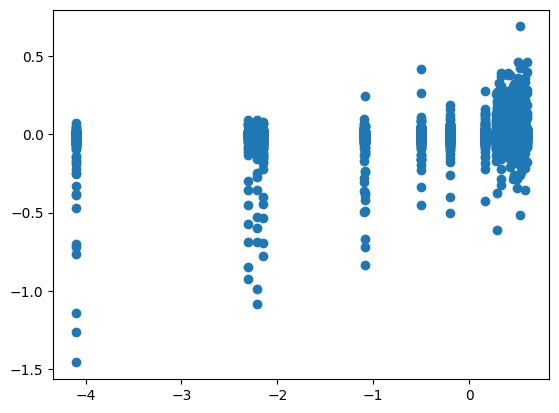

In [160]:
import matplotlib.pyplot as plt
plt.scatter(canonical_Y, canonical_X)

In [161]:
len(canonical_X)

15770

In [162]:
full_df['canonical_ecc'] = canonical_X

/tmp/ipykernel_34012/1006179168.py:1: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`



In [163]:
full_df.columns

Index(['cluster_id', 'pe_0', 'pe_1', 'pe_2', 'alpha_entropy0',
       'alpha_entropy1', 'alpha_entropy2', 'ecc', 'cluster_size', 'DGRP',
       ...
       'ecc_191', 'ecc_192', 'ecc_193', 'ecc_194', 'ecc_195', 'ecc_196',
       'ecc_197', 'ecc_198', 'ecc_199', 'canonical_ecc'],
      dtype='object', length=237)

In [164]:
# Sort the DataFrame in decreasing order based on the values in the column 'canonical_ecc'
sorted_df = full_df.sort_values(by='canonical_ecc', ascending=False)

# Take the first 100 rows to create a new DataFrame
top_100_df = sorted_df.head(100000)


In [165]:
top_100_df

,cluster_id,pe_0,pe_1,pe_2,alpha_entropy0,alpha_entropy1,alpha_entropy2,ecc,cluster_size,DGRP,...,ecc_191,ecc_192,ecc_193,ecc_194,ecc_195,ecc_196,ecc_197,ecc_198,ecc_199,canonical_ecc
6819,2679,NaN,NaN,NaN,0,0,0,"[2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, ...",5,DGRP_395,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,0.690840
13002,846,NaN,NaN,NaN,0,0,0,"[-9690.0, 2899.0, -14.0, -20.0, -34.0, -16.0, ...",7381,DGRP_304,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.461502
4822,1945,NaN,NaN,NaN,0,0,0,"[4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, ...",13,DGRP_595,...,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,1.0,0.460488
9072,2238,NaN,NaN,NaN,0,0,0,"[6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, ...",8,DGRP_100,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,0.437154
2490,1578,NaN,NaN,NaN,0,0,0,"[5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, ...",11,DGRP_850,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,0.423231
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11443,1349,NaN,NaN,NaN,0,0,0,"[3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, ...",6,DGRP_309,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,-0.989288
11579,2503,NaN,NaN,NaN,0,0,0,"[8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, ...",13,DGRP_309,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,-1.086571
10873,2456,NaN,NaN,NaN,0,0,0,"[-2364.0, -2364.0, -2364.0, -2364.0, 582.0, 58...",1966,DGRP_100,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,-1.139380
10766,1974,NaN,NaN,NaN,0,0,0,"[-1676.0, -1676.0, 348.0, 348.0, -16.0, -16.0,...",1526,DGRP_100,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,-1.263352


In [166]:
import plotly.express as px

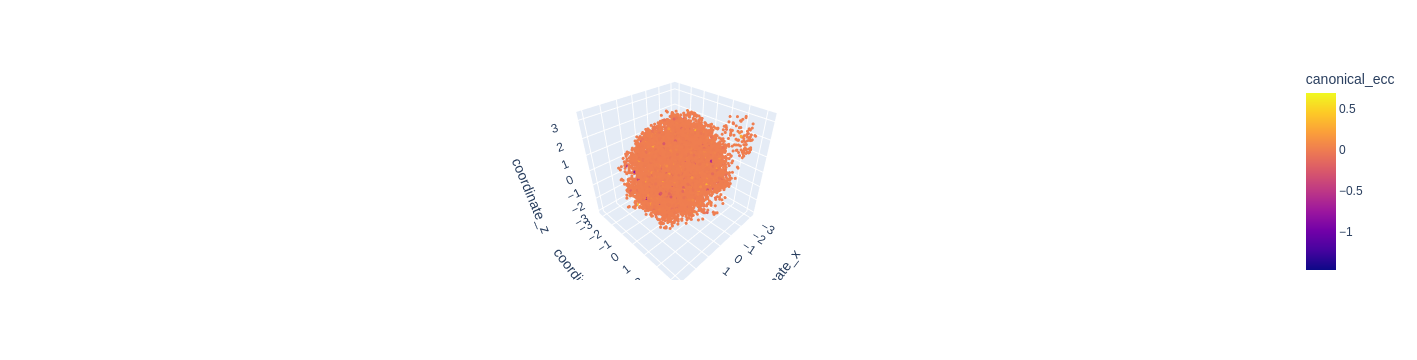

In [167]:
fig = px.scatter_3d(full_df, 'coordinate_x','coordinate_y','coordinate_z', color='canonical_ecc')
fig.update_traces(marker=dict(size=1))

In [168]:
full_df['DGRP'].unique()

array(['DGRP_309', 'DGRP_802', 'DGRP_786', 'DGRP_850', 'DGRP_790',
       'DGRP_595', 'DGRP_486', 'DGRP_517', 'DGRP_395', 'DGRP_195',
       'DGRP_208', 'DGRP_100', 'DGRP_321', 'DGRP_859', 'DGRP_405',
       'DGRP_105', 'DGRP_732', 'DGRP_879', 'DGRP_304', 'DGRP_228',
       'DGRP_584', 'DGRP_362', 'DGRP_354', 'DGRP_787'], dtype=object)

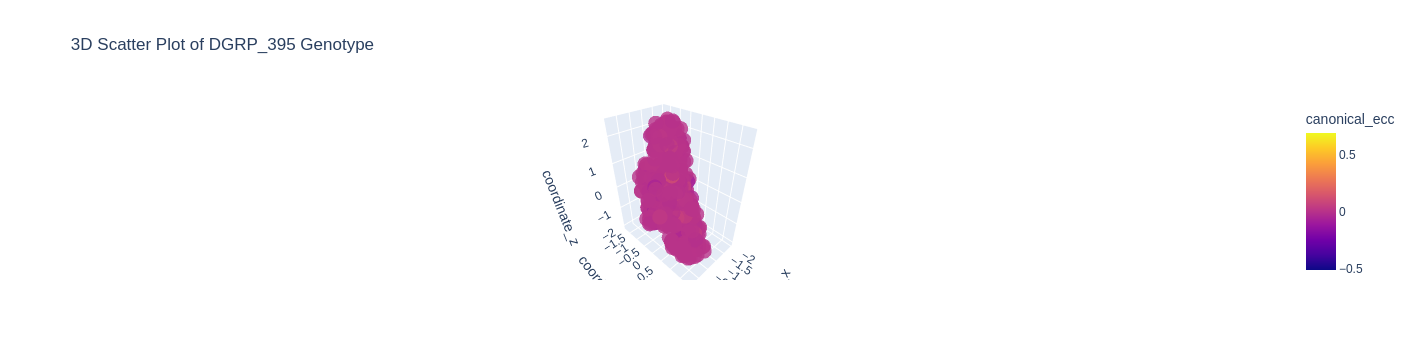

In [192]:
import plotly.express as px

# Filter the DataFrame for the 'DGRP_395' genotype
dgrp_395_df = full_df[full_df['DGRP'] == 'DGRP_395']

# Create a 3D scatter plot
fig = px.scatter_3d(dgrp_395_df, x='coordinate_x', y='coordinate_y', z='coordinate_z', color='canonical_ecc',
                    title='3D Scatter Plot of DGRP_395 Genotype', opacity = .8)
fig.update_traces(marker=dict(size=5))
# Show the plot
#fig.write_html('../Results_ECC/395_alphaEnt_KL_ls.html')


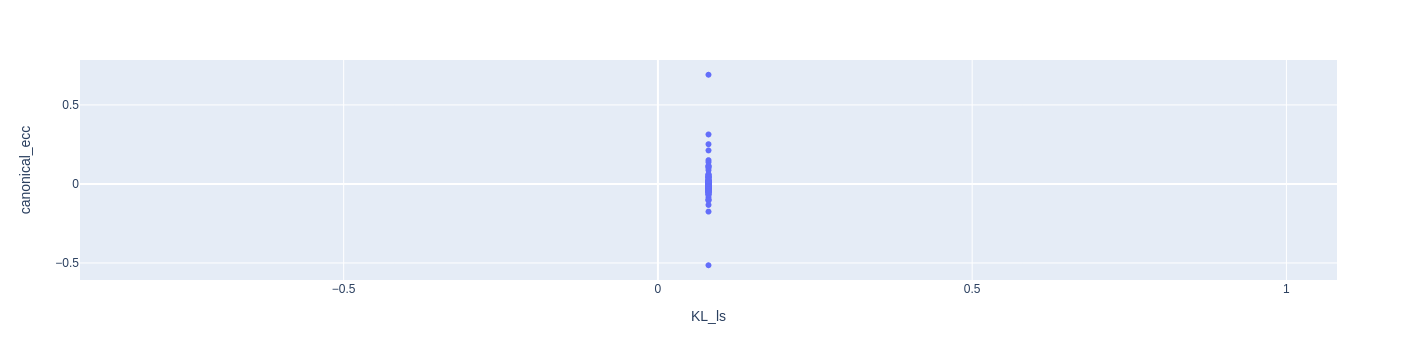

In [193]:
px.scatter(dgrp_395_df, 'KL_ls', 'canonical_ecc')